In [1]:
import re
import pandas as pd
import time
import warnings
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
warnings.filterwarnings("ignore")
from datetime import datetime

# Sample log data (replace this with the path to your log file)
log_file_path = 'tick_data_20241029_153255.txt'

# Define regex patterns for each log type
request_pattern = r'(\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}\.\d{3}) - Requesting market data for strike price: (\d+), right: (\w), date: (\d+), reqId=(\d+)'
greeks_pattern = r'(\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}\.\d{3}) - GREEKS: ReqId: (\d+), IV: ([\d.]+), Delta: ([\d.-]+), OptionPrice: ([\d.-]+|None), Gamma: ([\d.]+), Vega: ([\d.]+), Theta: ([\d.-]+), UnderlyingPrice: ([\d.]+)'
prices_pattern = r'(\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}\.\d{3}) - PRICES: ReqId: (\d+), TickType: (\d+), Price: ([\d.-]+), Attrib: CanAutoExecute: (\d), PastLimit: (\d), PreOpen: (\d)'

# Data lists for each log type
request_data = []
greeks_data = []
prices_data = []

# Read and parse the log file
with open(log_file_path, 'r') as file:
    for line in file:
        # Check for 'Requesting market data' line
        request_match = re.match(request_pattern, line)
        if request_match:
            request_data.append(request_match.groups())
            continue
        
        # Check for 'GREEKS' line
        greeks_match = re.match(greeks_pattern, line)
        if greeks_match:
            greeks_data.append(greeks_match.groups())
            continue
        
        # Check for 'PRICES' line
        prices_match = re.match(prices_pattern, line)
        if prices_match:
            prices_data.append(prices_match.groups())

# Create DataFrames from parsed data
df_requests = pd.DataFrame(request_data, columns=["Timestamp", "StrikePrice", "Right", "Date", "ReqId"])
df_requests["StrikePrice"] = df_requests["StrikePrice"].astype(int)
df_requests["Date"] = pd.to_datetime(df_requests["Date"], format='%Y%m%d')

df_greeks = pd.DataFrame(greeks_data, columns=["Timestamp", "ReqId", "IV", "Delta", "OptionPrice", "Gamma", "Vega", "Theta", "UnderlyingPrice"])
df_greeks["IV"] = df_greeks["IV"].astype(float)
df_greeks["Delta"] = df_greeks["Delta"].astype(float)
df_greeks["OptionPrice"] = pd.to_numeric(df_greeks["OptionPrice"], errors='coerce')
df_greeks["Gamma"] = df_greeks["Gamma"].astype(float)
df_greeks["Vega"] = df_greeks["Vega"].astype(float)
df_greeks["Theta"] = df_greeks["Theta"].astype(float)
df_greeks["UnderlyingPrice"] = df_greeks["UnderlyingPrice"].astype(float)

df_prices = pd.DataFrame(prices_data, columns=["Timestamp", "ReqId", "TickType", "Price", "CanAutoExecute", "PastLimit", "PreOpen"])
df_prices["Price"] = df_prices["Price"].astype(float)
df_prices["TickType"] = df_prices["TickType"].astype(int)
df_prices["CanAutoExecute"] = df_prices["CanAutoExecute"].astype(int)
df_prices["PastLimit"] = df_prices["PastLimit"].astype(int)
df_prices["PreOpen"] = df_prices["PreOpen"].astype(int)

In [2]:
print(len(df_requests))
df_requests

30


,Timestamp,StrikePrice,Right,Date,ReqId
0,2024-10-29 15:32:59.609,571,P,2024-10-29,101
1,2024-10-29 15:32:59.609,571,P,2024-10-30,102
2,2024-10-29 15:32:59.609,571,P,2024-11-05,103
3,2024-10-29 15:32:59.609,571,C,2024-10-29,104
4,2024-10-29 15:32:59.609,571,C,2024-10-30,105
5,2024-10-29 15:32:59.609,571,C,2024-11-05,106
6,2024-10-29 15:32:59.610,576,P,2024-10-29,107
7,2024-10-29 15:32:59.610,576,P,2024-10-30,108
8,2024-10-29 15:32:59.610,576,P,2024-11-05,109
9,2024-10-29 15:32:59.610,576,C,2024-10-29,110


In [3]:
#df_greeks

In [4]:
#df_prices

ELECCIÓN DE NIVELES

In [5]:
#elección del strike
level = 113
df_requests['ReqId'] = df_requests['ReqId'].astype(type(level))
print(level)

113


In [6]:
print(type(level))
print(df_requests['ReqId'].dtype)


<class 'int'>
int32


In [7]:
strike_price = df_requests.loc[df_requests['ReqId'] == level, 'StrikePrice'].values
tipo = df_requests.loc[df_requests['ReqId'] == level, 'Right'].values
vto = df_requests.loc[df_requests['ReqId'] == level, 'Date'].values
vto = pd.to_datetime(pd.Series(vto)).dt.date.values

# CLEAN df_prices option prices

In [8]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    # Filter rows within the 1.5 * IQR range
    df_filtered = df[~((df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR)))]
    return df_filtered

In [9]:
df_prices['ReqId'] = df_prices['ReqId'].astype(int)
df_prices = df_prices[df_prices['ReqId'] == level]
df_prices = df_prices.reset_index(drop=True)
df_prices = remove_outliers(df_prices, 'Price')
df_prices['Avg_Price'] = df_prices['Price'].rolling(window=100).mean()
df_prices = df_prices.drop(columns=['CanAutoExecute', 'PastLimit', 'PreOpen'])
df_prices

,Timestamp,ReqId,TickType,Price,Avg_Price
0,2024-10-29 15:33:00.965,113,4,1.22,NaN
2,2024-10-29 15:33:00.967,113,7,0.93,NaN
3,2024-10-29 15:33:00.967,113,9,1.26,NaN
4,2024-10-29 15:33:00.967,113,4,1.23,NaN
5,2024-10-29 15:33:00.969,113,1,1.22,NaN
...,...,...,...,...,...
50695,2024-10-29 21:14:59.267,113,1,0.05,0.0742
50696,2024-10-29 21:14:59.267,113,2,0.09,0.0742
50699,2024-10-29 21:15:00.140,113,1,0.05,0.0739
50700,2024-10-29 21:15:00.140,113,2,0.09,0.0739


In [10]:
# Subsegmento_Define the number of rows to display
seg = 200000
# Show only the first `seg` rows of the DataFrame
df_prices_filtered = df_prices.head(seg)

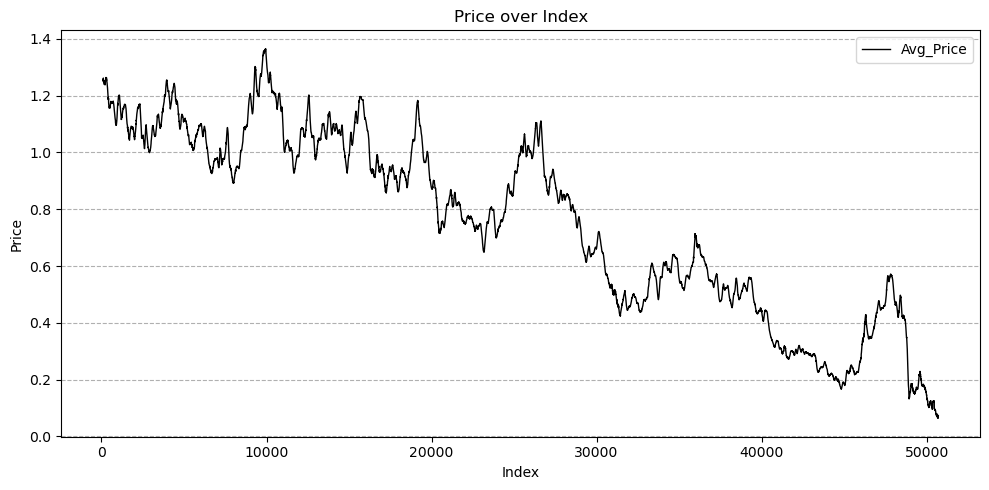

In [11]:
plt.figure(figsize=(10, 5))
plt.plot(df_prices_filtered.index, df_prices_filtered['Avg_Price'], color='black', label='Avg_Price', linewidth=1)
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Price over Index')
plt.legend()
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

# CLEAN  df_greeks prices

In [12]:
df_greeks = df_greeks[df_greeks['IV'] != 0]
df_greeks['ReqId'] = df_greeks['ReqId'].astype(int)
df_greeks = df_greeks[df_greeks['ReqId'] == level]
df_greeks['IV'] = df_greeks['IV'].round(3)
df_greeks = df_greeks.reset_index(drop=True)
df_greeks['UnderlyingPrice'] = df_greeks['UnderlyingPrice'].round(2)

In [13]:
#df_prices = remove_outliers(df_prices, 'Price')
df_greeks['Avg_IV'] = df_greeks['IV'].rolling(window=100).mean()
df_greeks['Avg_Theta'] = df_greeks['Theta'].rolling(window=100).mean()
df_greeks['Avg_Delta'] = df_greeks['Delta'].rolling(window=100).mean()
df_greeks['Avg_Gamma'] = df_greeks['Gamma'].rolling(window=100).mean()
df_greeks['Avg_Vega'] = df_greeks['Vega'].rolling(window=100).mean()

In [14]:
df_greeks

,Timestamp,ReqId,IV,Delta,OptionPrice,Gamma,Vega,Theta,UnderlyingPrice,Avg_IV,Avg_Theta,Avg_Delta,Avg_Gamma,Avg_Vega
0,2024-10-29 15:33:01.346,113,0.212,-0.5480,1.443672,0.1282,0.0592,-1.0217,580.58,NaN,NaN,NaN,NaN,NaN
1,2024-10-29 15:33:01.348,113,0.211,-0.4971,1.220000,0.1287,0.0590,-1.2200,581.00,NaN,NaN,NaN,NaN,NaN
2,2024-10-29 15:33:01.348,113,0.213,-0.4971,1.230000,0.1277,0.0590,-1.2300,581.00,NaN,NaN,NaN,NaN,NaN
3,2024-10-29 15:33:02.246,113,0.210,-0.5480,1.443672,0.1282,0.0592,-1.0217,580.58,NaN,NaN,NaN,NaN,NaN
4,2024-10-29 15:33:02.247,113,0.211,-0.5022,1.240000,0.1286,0.0590,-1.2000,580.96,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25284,2024-10-29 21:14:56.199,113,0.543,-0.0915,0.040000,0.1193,0.0043,-0.0400,582.83,0.56394,-0.0598,-0.100614,0.120053,0.004442
25285,2024-10-29 21:14:58.045,113,0.543,-0.0915,0.050000,0.1193,0.0043,-0.0500,582.83,0.56254,-0.0596,-0.100006,0.119882,0.004430
25286,2024-10-29 21:15:00.143,113,0.543,-0.0965,0.050000,0.1241,0.0043,-0.0500,582.79,0.56268,-0.0593,-0.100039,0.119882,0.004430
25287,2024-10-29 21:15:00.143,113,0.683,-0.1498,0.060000,0.1348,0.0055,-0.0600,582.79,0.56408,-0.0593,-0.100473,0.119895,0.004442


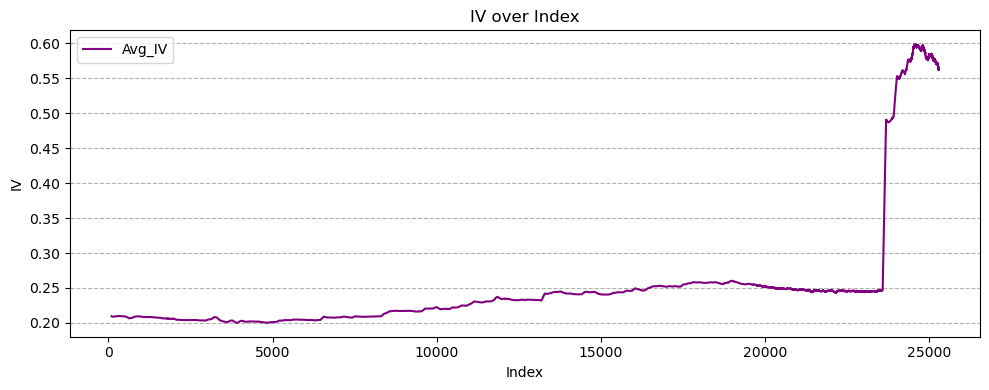

In [15]:
plt.figure(figsize=(10, 4))
plt.plot(df_greeks.index, df_greeks['Avg_IV'], color='purple', label='Avg_IV')
plt.xlabel('Index')
plt.ylabel('IV')
plt.title('IV over Index')
plt.legend()
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

In [16]:
# Define the number of rows to display
seg = 15000
df_greeks_seg = df_greeks.head(seg)

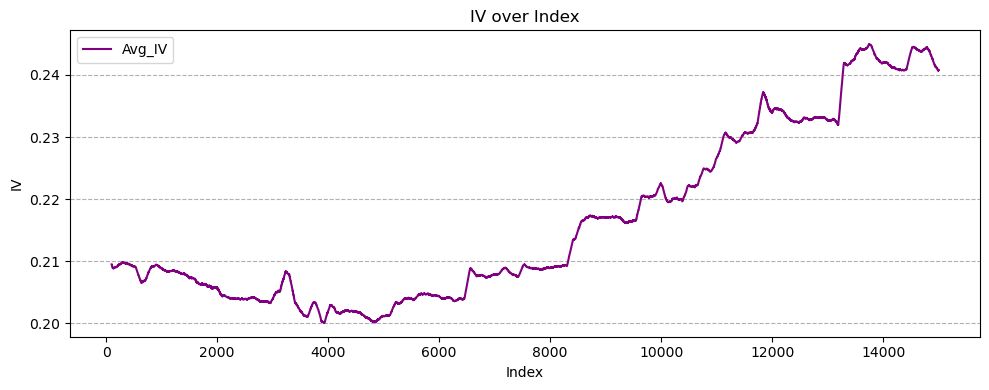

In [17]:
plt.figure(figsize=(10, 4))
plt.plot(df_greeks_seg.index, df_greeks_seg['Avg_IV'], color='purple', label='Avg_IV')
plt.xlabel('Index')
plt.ylabel('IV')
plt.title('IV over Index')
plt.legend()
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

# Unión de los Dataframes

In [18]:
df_greeks

,Timestamp,ReqId,IV,Delta,OptionPrice,Gamma,Vega,Theta,UnderlyingPrice,Avg_IV,Avg_Theta,Avg_Delta,Avg_Gamma,Avg_Vega
0,2024-10-29 15:33:01.346,113,0.212,-0.5480,1.443672,0.1282,0.0592,-1.0217,580.58,NaN,NaN,NaN,NaN,NaN
1,2024-10-29 15:33:01.348,113,0.211,-0.4971,1.220000,0.1287,0.0590,-1.2200,581.00,NaN,NaN,NaN,NaN,NaN
2,2024-10-29 15:33:01.348,113,0.213,-0.4971,1.230000,0.1277,0.0590,-1.2300,581.00,NaN,NaN,NaN,NaN,NaN
3,2024-10-29 15:33:02.246,113,0.210,-0.5480,1.443672,0.1282,0.0592,-1.0217,580.58,NaN,NaN,NaN,NaN,NaN
4,2024-10-29 15:33:02.247,113,0.211,-0.5022,1.240000,0.1286,0.0590,-1.2000,580.96,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25284,2024-10-29 21:14:56.199,113,0.543,-0.0915,0.040000,0.1193,0.0043,-0.0400,582.83,0.56394,-0.0598,-0.100614,0.120053,0.004442
25285,2024-10-29 21:14:58.045,113,0.543,-0.0915,0.050000,0.1193,0.0043,-0.0500,582.83,0.56254,-0.0596,-0.100006,0.119882,0.004430
25286,2024-10-29 21:15:00.143,113,0.543,-0.0965,0.050000,0.1241,0.0043,-0.0500,582.79,0.56268,-0.0593,-0.100039,0.119882,0.004430
25287,2024-10-29 21:15:00.143,113,0.683,-0.1498,0.060000,0.1348,0.0055,-0.0600,582.79,0.56408,-0.0593,-0.100473,0.119895,0.004442


In [19]:
df_greeks['Timestamp'] = pd.to_datetime(df_greeks['Timestamp'])
df_prices_filtered['Timestamp'] = pd.to_datetime(df_prices_filtered['Timestamp'])

# Ordena ambos DataFrames por la columna 'Timestamp' para que el merge_asof funcione correctamente
df1 = df_greeks.sort_values(by='Timestamp')
df2 = df_prices_filtered.sort_values(by='Timestamp')

# Realiza una unión "asof" en el campo 'Timestamp', uniendo filas de acuerdo al valor más cercano de Timestamp
# Esta unión no es estrictamente igual (como un "join" clásico) sino que une la información más próxima
df = pd.merge_asof(df1, df2, on='Timestamp', direction='nearest')
df = df.drop(columns=['ReqId_y'])

In [20]:
df['PCRDelta'] = 0.0
df['PCRTheta'] = 0.0
df['PCRVega'] = 0.0

In [21]:
# Define the number of rows to display
seg = 23000
df = df.head(seg)

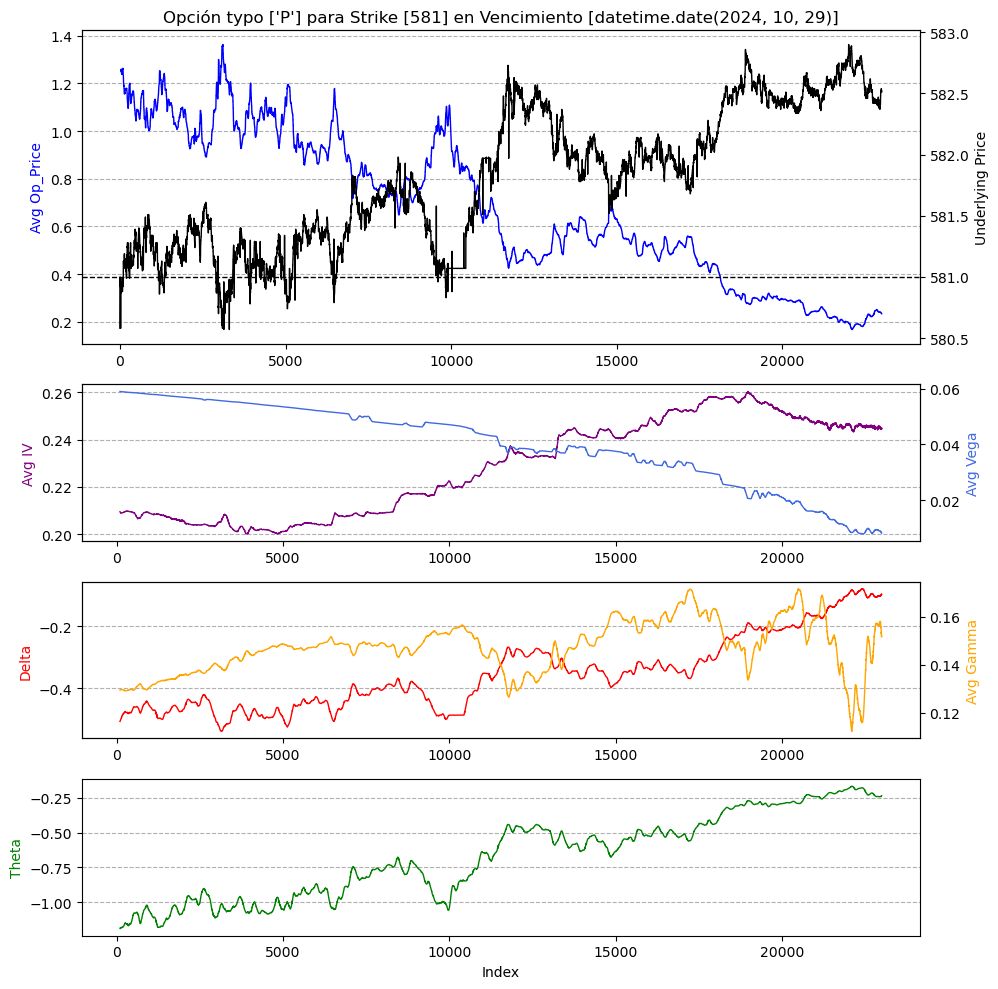

In [22]:
fig = plt.figure(figsize=(10, 10))
gs = gridspec.GridSpec(4, 1, height_ratios=[2, 1, 1, 1])  # Adjust layout ratios for four subplots

ax1 = fig.add_subplot(gs[0])
ax1.plot(df.index, df['Avg_Price'], color='blue', label='Avg_Op_Price', linewidth=1)
ax1.set_ylabel('Avg Op_Price')
ax1.yaxis.label.set_color('blue')
ax1.grid(axis='y', linestyle='--')

ax2 = ax1.twinx()
ax2.plot(df.index, df['UnderlyingPrice'], color='black', label='UnderlyingPrice', linewidth=1)
ax2.set_ylabel('Underlying Price')
ax2.axhline(y=581, color='black', linestyle='--', linewidth=1)
ax2.yaxis.label.set_color('black')

ax1.set_title(f'Opción typo {tipo} para Strike {strike_price} en Vencimiento {vto}')

ax3 = fig.add_subplot(gs[1])
ax3.plot(df.index, df['Avg_IV'], color='purple', label='Avg_IV', linewidth=1)
ax3.set_ylabel('Avg IV')
ax3.yaxis.label.set_color('purple')
ax3.grid(axis='y', linestyle='--')

ax3_vega = ax3.twinx()
ax3_vega.plot(df.index, df['Avg_Vega'], color='royalblue', label='Avg_Vega', linewidth=1)
ax3_vega.set_ylabel('Avg Vega')
ax3_vega.yaxis.label.set_color('royalblue')

ax5 = fig.add_subplot(gs[2])
ax5.plot(df.index, df['Avg_Delta'], color='red', label='Delta', linewidth=1)
ax5.set_ylabel('Delta')
ax5.yaxis.label.set_color('red')
ax5.grid(axis='y', linestyle='--')

ax6 = ax5.twinx()
ax6.plot(df.index, df['Avg_Gamma'], color='orange', label='Avg_Gamma', linewidth=1)
ax6.set_ylabel('Avg Gamma')
ax6.yaxis.label.set_color('orange')

ax7 = fig.add_subplot(gs[3])
ax7.plot(df.index, df['Avg_Theta'], color='green', label='Theta', linewidth=1)
ax7.set_ylabel('Theta')
ax7.yaxis.label.set_color('green')
ax7.set_xlabel('Index')
ax7.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

# Griegas

In [23]:
fila_100 = df.iloc[100]
print(fila_100)

Timestamp          2024-10-29 15:34:08.229000
ReqId_x                                   113
IV                                       0.21
Delta                                 -0.4894
OptionPrice                               1.2
Gamma                                  0.1292
Vega                                   0.0589
Theta                                    -1.2
UnderlyingPrice                        581.06
Avg_IV                                0.20948
Avg_Theta                           -1.187243
Avg_Delta                           -0.506441
Avg_Gamma                            0.129361
Avg_Vega                             0.058967
TickType                                    4
Price                                    1.19
Avg_Price                              1.2356
PCRDelta                                  0.0
PCRTheta                                  0.0
PCRVega                                   0.0
Name: 100, dtype: object


In [24]:
fila_final = df.iloc[500]

# Imprime el resultado
print(fila_final)

Timestamp          2024-10-29 15:38:54.062000
ReqId_x                                   113
IV                                      0.209
Delta                                 -0.4673
OptionPrice                               1.1
Gamma                                  0.1297
Vega                                   0.0585
Theta                                    -1.1
UnderlyingPrice                        581.23
Avg_IV                                0.20915
Avg_Theta                             -1.0877
Avg_Delta                           -0.462298
Avg_Gamma                            0.129425
Avg_Vega                             0.058543
TickType                                    2
Price                                    1.11
Avg_Price                              1.0783
PCRDelta                                  0.0
PCRTheta                                  0.0
PCRVega                                   0.0
Name: 500, dtype: object


In [25]:
Timestamp_100 = df.loc[100, 'Timestamp']           
UnderlyingPrice_100 = df.loc[100, 'UnderlyingPrice']                 
delta_100 = df.loc[100, 'Delta']
theta_100 = df.loc[100, 'Theta']
vega_100 = df.loc[100, 'Vega']
gamma_100 = df.loc[100, 'Gamma']
IV_100 = df.loc[100, 'IV']

In [26]:
def calcular_impactos_bis(delta_100, theta_100, vega_100, gamma_100, IV_100, Timestamp_100, UnderlyingPrice_100, fin, df):
    # Extraer valores de la fila fin
    Timestamp_fin = df.loc[fin, 'Timestamp']
    UnderlyingPrice_fin = df.loc[fin, 'UnderlyingPrice']
    delta_fin = df.loc[fin, 'Delta']
    theta_fin = df.loc[fin, 'Theta']
    vega_fin = df.loc[fin, 'Vega']
    gamma_fin = df.loc[fin, 'Gamma']
    IV_fin = df.loc[fin, 'IV']
    
    # Comprobar valores nulos antes de calcular
    if pd.isnull([Timestamp_fin, UnderlyingPrice_fin, delta_fin, theta_fin, vega_fin, gamma_fin, IV_fin]).any():
        print(f"Valores nulos en la fila {fin}, saltando iteración.")
        return

    # 1. Calcular el impacto de Delta
    diferencia_precio_subyacente = round(UnderlyingPrice_fin - UnderlyingPrice_100, 3)
    impacto_delta = round(diferencia_precio_subyacente * delta_100, 4)

    # 2. Calcular el impacto de Theta
    tiempo_transcurrido_dias = round((Timestamp_fin - Timestamp_100).total_seconds() / 86400, 4)  # 86400 segundos en un día
    impacto_theta = round(theta_100 * tiempo_transcurrido_dias, 4)

    # 3. Calcular el impacto de Vega
    diferencia_iv = round(IV_fin - IV_100, 4)
    impacto_vega = round(diferencia_iv * vega_100, 4)
    
    # Calcular el porcentaje de cada impacto
    impacto_total_prima = round(impacto_delta + impacto_theta + impacto_vega,4)
    if impacto_total_prima != 0:
        impacto_delta_pct = round((impacto_delta / impacto_total_prima) * 100, 2)
        impacto_theta_pct = round((impacto_theta / impacto_total_prima) * 100, 2)
        impacto_vega_pct = round((impacto_vega / impacto_total_prima) * 100, 2)
    else:
        impacto_delta_pct = impacto_theta_pct = impacto_vega_pct = 0
    
    # Asignar los valores de los porcentajes a las columnas del DataFrame
    df.at[fin, 'PCRDelta'] = abs(impacto_delta_pct)
    df.at[fin, 'PCRTheta'] = abs(impacto_theta_pct)
    df.at[fin, 'PCRVega'] = abs(impacto_vega_pct)
  
 
    # Mostrar los cálculos paso a paso y los resultados
    print(f"Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.{fin}")
    print(f"Diferencia subyacente: {diferencia_precio_subyacente}")
    print(f"Tiempo transcurrido:   {tiempo_transcurrido_dias} dias")
    print()
    print(f"Impacto Delta: {impacto_delta}  ({impacto_delta_pct}%)")    
    print(f"Impacto Theta: {impacto_theta}  ({impacto_theta_pct}%)")    
    print(f"Impacto Vega:  {impacto_vega}    ({impacto_vega_pct}%)")
    print(f"IV: inicial {IV_100}-final {IV_fin}: Diferencia IV:{diferencia_iv}")
    print()
    print(f"Impacto agregado en la Prima: {impacto_total_prima}")
    print("-------------------------------------------------------------------------")

    # Generar gráfico de pastel solo si impacto_total_prima no es cero
    if impacto_total_prima != 0:
        labels = ['Delta', 'Theta', 'Vega']
        impactos = [abs(impacto_delta), abs(impacto_theta), abs(impacto_vega)]
        
        plt.figure(figsize=(6, 3), facecolor='whitesmoke')
        plt.pie(impactos, labels=labels, autopct='%1.1f%%', startangle=140)
        plt.title("Reparto absoluto de cada griega en la prima")
        #plt.show()

In [39]:
def calcular_impactos(delta_100, theta_100, vega_100, gamma_100, IV_100, Timestamp_100, UnderlyingPrice_100, fin, df):
    # Extraer valores de la fila fin
    Timestamp_fin = df.loc[fin, 'Timestamp']
    UnderlyingPrice_fin = df.loc[fin, 'UnderlyingPrice']
    delta_fin = df.loc[fin, 'Delta']
    theta_fin = df.loc[fin, 'Theta']
    vega_fin = df.loc[fin, 'Vega']
    gamma_fin = df.loc[fin, 'Gamma']
    IV_fin = df.loc[fin, 'IV']
    
    # Comprobar valores nulos antes de calcular
    if pd.isnull([Timestamp_fin, UnderlyingPrice_fin, delta_fin, theta_fin, vega_fin, gamma_fin, IV_fin]).any():
        print(f"Valores nulos en la fila {fin}, saltando iteración.")
        return

    # 1. Calcular el impacto de Delta
    diferencia_precio_subyacente = round(UnderlyingPrice_fin - UnderlyingPrice_100, 3)
    impacto_delta = round(diferencia_precio_subyacente * delta_100, 4)

    # 2. Calcular el impacto de Theta
    tiempo_transcurrido_dias = round((Timestamp_fin - Timestamp_100).total_seconds() / 86400, 4)  # 86400 segundos en un día
    impacto_theta = round(theta_100 * tiempo_transcurrido_dias, 4)

    # 3. Calcular el impacto de Vega
    diferencia_iv = round(IV_fin - IV_100, 4)
    impacto_vega = round(diferencia_iv * vega_100, 4)
    
    # Calcular el porcentaje de cada impacto
    impacto_total_prima = round(impacto_delta + impacto_theta + impacto_vega, 4)
    if impacto_total_prima != 0:
        impacto_delta_pct = round((impacto_delta / impacto_total_prima) , 2)
        impacto_theta_pct = round((impacto_theta / impacto_total_prima) , 2)
        impacto_vega_pct = round((impacto_vega / impacto_total_prima) , 2)
    else:
        impacto_delta_pct = impacto_theta_pct = impacto_vega_pct = 0
    
    # Asignar los valores de los porcentajes a las columnas del DataFrame
    df.at[fin, 'PCRDelta'] = abs(impacto_delta_pct)
    df.at[fin, 'PCRTheta'] = abs(impacto_theta_pct)
    df.at[fin, 'PCRVega'] = abs(impacto_vega_pct)
  
    # Mostrar los cálculos paso a paso y los resultados
    print(f"Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.{fin}")
    print(f"Diferencia subyacente: {diferencia_precio_subyacente}")
    print(f"Tiempo transcurrido:   {tiempo_transcurrido_dias} dias")
    print()
    print(f"Impacto Delta: {impacto_delta}  ({impacto_delta_pct}%)")    
    print(f"Impacto Theta: {impacto_theta}  ({impacto_theta_pct}%)")    
    print(f"Impacto Vega:  {impacto_vega}    ({impacto_vega_pct}%)")
    print(f"IV: inicial {IV_100}-final {IV_fin}: Diferencia IV:{diferencia_iv}")
    print()
    print(f"Impacto agregado en la Prima: {impacto_total_prima}")
    print("-------------------------------------------------------------------------")


In [28]:
#valor discreto 
fin = 500
calcular_impactos(delta_100, theta_100, vega_100, gamma_100, IV_100, Timestamp_100, UnderlyingPrice_100, fin, df)

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.500
Diferencia subyacente: 0.17
Tiempo transcurrido:   0.0033 dias

Impacto Delta: -0.0832  (95.3%)
Impacto Theta: -0.004  (4.58%)
Impacto Vega:  -0.0001    (0.11%)
IV: inicial 0.21-final 0.209: Diferencia IV:-0.001

Impacto agregado en la Prima: -0.0873
-------------------------------------------------------------------------


In [29]:
print(len(df))

23000


In [30]:
for i in range(100, 200):
    calcular_impactos(delta_100, theta_100, vega_100, gamma_100, IV_100, Timestamp_100, UnderlyingPrice_100, fin=i, df=df)
    time.sleep(0.2)

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.100
Diferencia subyacente: 0.0
Tiempo transcurrido:   0.0 dias

Impacto Delta: -0.0  (0%)
Impacto Theta: -0.0  (0%)
Impacto Vega:  0.0    (0%)
IV: inicial 0.21-final 0.21: Diferencia IV:0.0

Impacto agregado en la Prima: 0.0
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.101
Diferencia subyacente: 0.0
Tiempo transcurrido:   0.0 dias

Impacto Delta: -0.0  (0.0%)
Impacto Theta: -0.0  (0.0%)
Impacto Vega:  -0.0002    (100.0%)
IV: inicial 0.21-final 0.207: Diferencia IV:-0.003

Impacto agregado en la Prima: -0.0002
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.102
Diferencia subyacente: 0.07
Tiempo transcurrido:   0.0 dias

Impacto Delta: -0.0343  (99.71%)
Impacto Theta: -0.0  (0.0%)
Impacto Vega:  -0.0001    (0.29%)
IV: inicial 0.21-f

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.122
Diferencia subyacente: 0.01
Tiempo transcurrido:   0.0002 dias

Impacto Delta: -0.0049  (94.23%)
Impacto Theta: -0.0002  (3.85%)
Impacto Vega:  -0.0001    (1.92%)
IV: inicial 0.21-final 0.208: Diferencia IV:-0.002

Impacto agregado en la Prima: -0.0052
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.123
Diferencia subyacente: 0.09
Tiempo transcurrido:   0.0002 dias

Impacto Delta: -0.044  (99.32%)
Impacto Theta: -0.0002  (0.45%)
Impacto Vega:  -0.0001    (0.23%)
IV: inicial 0.21-final 0.208: Diferencia IV:-0.002

Impacto agregado en la Prima: -0.0443
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.124
Diferencia subyacente: 0.09
Tiempo transcurrido:   0.0002 dias

Impacto Delta: -0.044  (99.55%)
Impacto Theta: -0.0002  (0.45%)
Imp

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.144
Diferencia subyacente: 0.06
Tiempo transcurrido:   0.0003 dias

Impacto Delta: -0.0294  (98.99%)
Impacto Theta: -0.0004  (1.35%)
Impacto Vega:  0.0001    (-0.34%)
IV: inicial 0.21-final 0.212: Diferencia IV:0.002

Impacto agregado en la Prima: -0.0297
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.145
Diferencia subyacente: 0.09
Tiempo transcurrido:   0.0004 dias

Impacto Delta: -0.044  (99.1%)
Impacto Theta: -0.0005  (1.13%)
Impacto Vega:  0.0001    (-0.23%)
IV: inicial 0.21-final 0.211: Diferencia IV:0.001

Impacto agregado en la Prima: -0.0444
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.146
Diferencia subyacente: 0.09
Tiempo transcurrido:   0.0004 dias

Impacto Delta: -0.044  (98.88%)
Impacto Theta: -0.0005  (1.12%)
Impact

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.166
Diferencia subyacente: 0.07
Tiempo transcurrido:   0.0005 dias

Impacto Delta: -0.0343  (98.28%)
Impacto Theta: -0.0006  (1.72%)
Impacto Vega:  0.0    (-0.0%)
IV: inicial 0.21-final 0.21: Diferencia IV:0.0

Impacto agregado en la Prima: -0.0349
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.167
Diferencia subyacente: 0.07
Tiempo transcurrido:   0.0005 dias

Impacto Delta: -0.0343  (98.0%)
Impacto Theta: -0.0006  (1.71%)
Impacto Vega:  -0.0001    (0.29%)
IV: inicial 0.21-final 0.209: Diferencia IV:-0.001

Impacto agregado en la Prima: -0.035
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.168
Diferencia subyacente: 0.04
Tiempo transcurrido:   0.0006 dias

Impacto Delta: -0.0196  (96.08%)
Impacto Theta: -0.0007  (3.43%)
Impacto Veg

Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.187
Diferencia subyacente: -0.02
Tiempo transcurrido:   0.0007 dias

Impacto Delta: 0.0098  (110.11%)
Impacto Theta: -0.0008  (-8.99%)
Impacto Vega:  -0.0001    (-1.12%)
IV: inicial 0.21-final 0.208: Diferencia IV:-0.002

Impacto agregado en la Prima: 0.0089
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.188
Diferencia subyacente: -0.02
Tiempo transcurrido:   0.0007 dias

Impacto Delta: 0.0098  (108.89%)
Impacto Theta: -0.0008  (-8.89%)
Impacto Vega:  0.0    (0.0%)
IV: inicial 0.21-final 0.21: Diferencia IV:0.0

Impacto agregado en la Prima: 0.009
-------------------------------------------------------------------------
Cálculo de impactos por griega entre filas 100 y fin. Iteración Núm.189
Diferencia subyacente: -0.02
Tiempo transcurrido:   0.0007 dias

Impacto Delta: 0.0098  (108.89%)
Impacto Theta: -0.0008  (-8.89%)
Impact

In [31]:
# Inspector de una fila
row_loc = df.iloc[112]  # La fila 500 corresponde al índice 499 en Python
print(row_loc)

Timestamp          2024-10-29 15:34:16.158000
ReqId_x                                   113
IV                                       0.21
Delta                                 -0.4855
OptionPrice                              1.18
Gamma                                   0.129
Vega                                   0.0589
Theta                                   -1.18
UnderlyingPrice                        581.09
Avg_IV                                0.20916
Avg_Theta                           -1.185026
Avg_Delta                           -0.503546
Avg_Gamma                            0.129523
Avg_Vega                             0.058953
TickType                                    1
Price                                    1.18
Avg_Price                              1.1909
PCRDelta                                99.32
PCRTheta                                 0.68
PCRVega                                   0.0
Name: 112, dtype: object


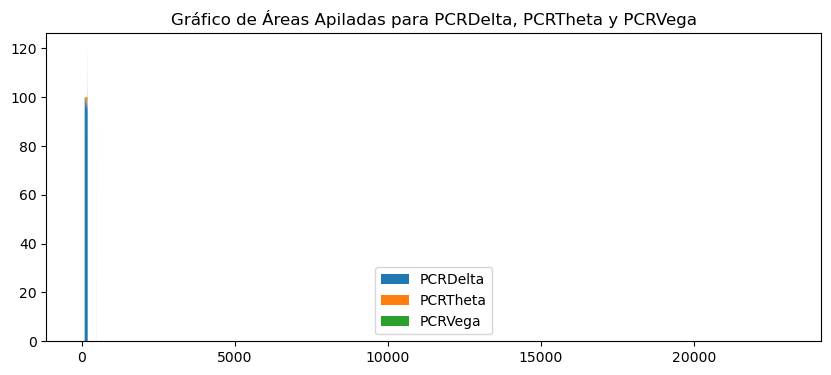

In [40]:
plt.figure(figsize=(10,4))
# Definir el eje x como el índice del DataFrame
x = df.index

# Graficar el área apilada para PCRDelta, PCRTheta y PCRVega
plt.stackplot(x, df['PCRDelta'], df['PCRTheta'], df['PCRVega'], labels=['PCRDelta', 'PCRTheta', 'PCRVega'])

# Añadir título y leyenda
plt.title('Gráfico de Áreas Apiladas para PCRDelta, PCRTheta y PCRVega')
plt.legend(loc='lower center')

# Mostrar el gráfico
plt.show()

In [38]:
print(df[['PCRDelta', 'PCRTheta', 'PCRVega']].describe())


           PCRDelta      PCRTheta       PCRVega
count  23000.000000  23000.000000  23000.000000
mean       0.423185      0.009204      0.005357
std        6.438593      0.186436      0.659869
min        0.000000      0.000000      0.000000
25%        0.000000      0.000000      0.000000
50%        0.000000      0.000000      0.000000
75%        0.000000      0.000000      0.000000
max      110.110000      8.990000    100.000000


In [33]:
print(df['PCRDelta'],df['PCRTheta'],df['PCRVega'])

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
22995    0.0
22996    0.0
22997    0.0
22998    0.0
22999    0.0
Name: PCRDelta, Length: 23000, dtype: float64 0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
22995    0.0
22996    0.0
22997    0.0
22998    0.0
22999    0.0
Name: PCRTheta, Length: 23000, dtype: float64 0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
22995    0.0
22996    0.0
22997    0.0
22998    0.0
22999    0.0
Name: PCRVega, Length: 23000, dtype: float64


In [41]:
# Filtrar filas donde 'PCRDelta' > 100
high_pcr_delta_rows = df[df['PCRDelta'] > 100]

# Mostrar los resultados
print(high_pcr_delta_rows)

                  Timestamp  ReqId_x     IV   Delta  OptionPrice   Gamma  \
104 2024-10-29 15:34:10.160      113  0.212 -0.4806     1.170000  0.1276   
187 2024-10-29 15:35:10.013      113  0.208 -0.4919     1.200000  0.1305   
188 2024-10-29 15:35:10.013      113  0.210 -0.4919     1.220000  0.1295   
189 2024-10-29 15:35:10.013      113  0.210 -0.4919     1.180000  0.1294   
196 2024-10-29 15:35:16.115      113  0.210 -0.4877     1.195396  0.1292   

       Vega   Theta  UnderlyingPrice   Avg_IV  Avg_Theta  Avg_Delta  \
104  0.0589 -1.1700           581.13  0.20940  -1.187726  -0.505302   
187  0.0588 -1.2000           581.04  0.20908  -1.175700  -0.484012   
188  0.0588 -1.2200           581.04  0.20908  -1.176000  -0.483858   
189  0.0588 -1.1800           581.04  0.20909  -1.175900  -0.483703   
196  0.0588 -1.1954           580.99  0.20916  -1.174254  -0.482334   

     Avg_Gamma  Avg_Vega  TickType  Price  Avg_Price  PCRDelta  PCRTheta  \
104   0.129403  0.058961         4   1.1

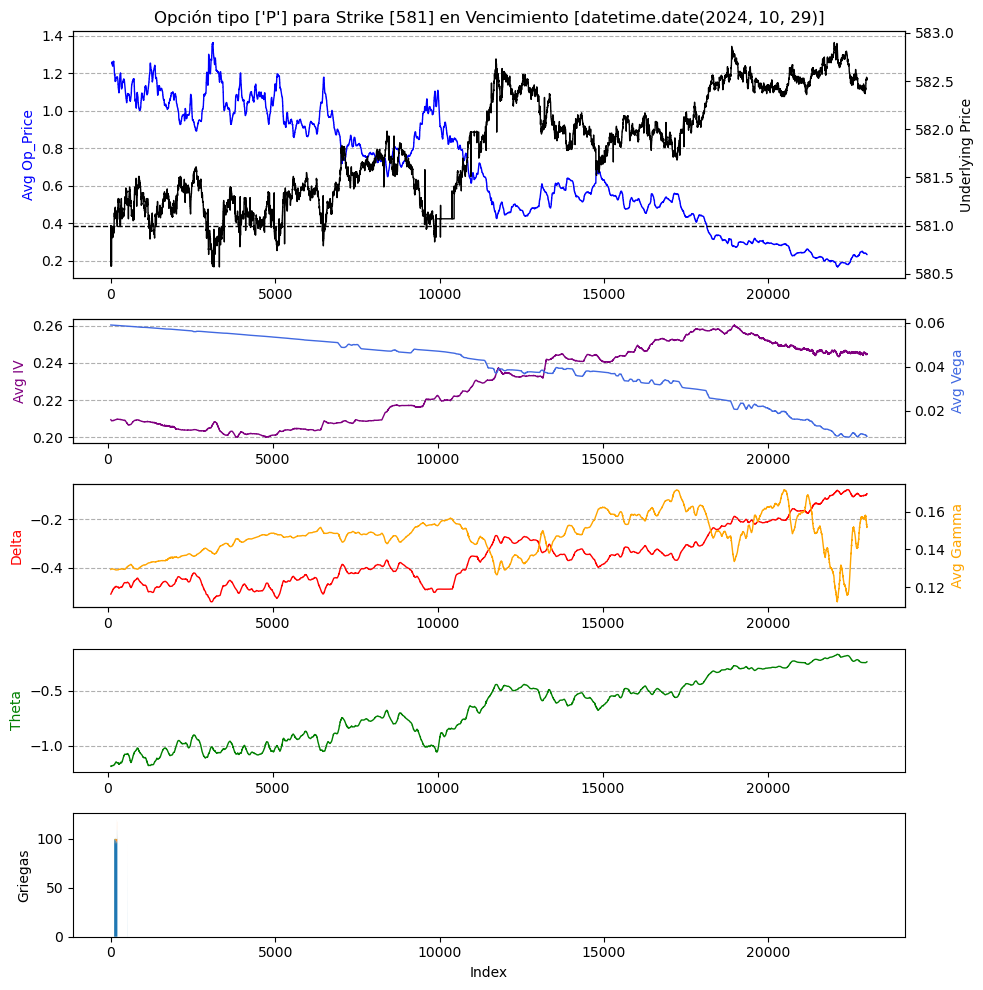

In [34]:
# Crear el gráfico principal con cuatro subgráficos y un gráfico apilado adicional
fig = plt.figure(figsize=(10, 10))
gs = gridspec.GridSpec(5, 1, height_ratios=[2, 1, 1, 1, 1])  # Añadir una fila más para el gráfico apilado

# Primer gráfico - Avg_Price y UnderlyingPrice
ax1 = fig.add_subplot(gs[0])
ax1.plot(df.index, df['Avg_Price'], color='blue', label='Avg_Op_Price', linewidth=1)
ax1.set_ylabel('Avg Op_Price')
ax1.yaxis.label.set_color('blue')
ax1.grid(axis='y', linestyle='--')

ax2 = ax1.twinx()
ax2.plot(df.index, df['UnderlyingPrice'], color='black', label='UnderlyingPrice', linewidth=1)
ax2.set_ylabel('Underlying Price')
ax2.axhline(y=581, color='black', linestyle='--', linewidth=1)
ax2.yaxis.label.set_color('black')

ax1.set_title(f'Opción tipo {tipo} para Strike {strike_price} en Vencimiento {vto}')

# Segundo gráfico - Avg_IV y Avg_Vega
ax3 = fig.add_subplot(gs[1])
ax3.plot(df.index, df['Avg_IV'], color='purple', label='Avg_IV', linewidth=1)
ax3.set_ylabel('Avg IV')
ax3.yaxis.label.set_color('purple')
ax3.grid(axis='y', linestyle='--')

ax3_vega = ax3.twinx()
ax3_vega.plot(df.index, df['Avg_Vega'], color='royalblue', label='Avg_Vega', linewidth=1)
ax3_vega.set_ylabel('Avg Vega')
ax3_vega.yaxis.label.set_color('royalblue')

# Tercer gráfico - Avg_Delta y Avg_Gamma
ax5 = fig.add_subplot(gs[2])
ax5.plot(df.index, df['Avg_Delta'], color='red', label='Delta', linewidth=1)
ax5.set_ylabel('Delta')
ax5.yaxis.label.set_color('red')
ax5.grid(axis='y', linestyle='--')

ax6 = ax5.twinx()
ax6.plot(df.index, df['Avg_Gamma'], color='orange', label='Avg_Gamma', linewidth=1)
ax6.set_ylabel('Avg Gamma')
ax6.yaxis.label.set_color('orange')

# Cuarto gráfico - Avg_Theta
ax7 = fig.add_subplot(gs[3])
ax7.plot(df.index, df['Avg_Theta'], color='green', label='Theta', linewidth=1)
ax7.set_ylabel('Theta')
ax7.yaxis.label.set_color('green')
ax7.grid(axis='y', linestyle='--')

# Quinto gráfico - Gráfico de área apilada de PCRDelta, PCRTheta y PCRVega
ax8 = fig.add_subplot(gs[4])
x = df.index  # Eje X como índice del DataFrame
ax8.stackplot(x, df['PCRDelta'], df['PCRTheta'], df['PCRVega'], labels=['PCRDelta', 'PCRTheta', 'PCRVega'])
ax8.set_ylabel('Griegas')
ax8.set_xlabel('Index')

# Ajustar el diseño y mostrar el gráfico
plt.tight_layout()
plt.show()

In [35]:
df.to_csv('griegas_apiladas.csv', index=False)

In [36]:
df

,Timestamp,ReqId_x,IV,Delta,OptionPrice,Gamma,Vega,Theta,UnderlyingPrice,Avg_IV,Avg_Theta,Avg_Delta,Avg_Gamma,Avg_Vega,TickType,Price,Avg_Price,PCRDelta,PCRTheta,PCRVega
0,2024-10-29 15:33:01.346,113,0.212,-0.5480,1.443672,0.1282,0.0592,-1.0217,580.58,NaN,NaN,NaN,NaN,NaN,1,1.22,NaN,0.0,0.0,0.0
1,2024-10-29 15:33:01.348,113,0.211,-0.4971,1.220000,0.1287,0.0590,-1.2200,581.00,NaN,NaN,NaN,NaN,NaN,1,1.22,NaN,0.0,0.0,0.0
2,2024-10-29 15:33:01.348,113,0.213,-0.4971,1.230000,0.1277,0.0590,-1.2300,581.00,NaN,NaN,NaN,NaN,NaN,1,1.22,NaN,0.0,0.0,0.0
3,2024-10-29 15:33:02.246,113,0.210,-0.5480,1.443672,0.1282,0.0592,-1.0217,580.58,NaN,NaN,NaN,NaN,NaN,4,1.25,NaN,0.0,0.0,0.0
4,2024-10-29 15:33:02.247,113,0.211,-0.5022,1.240000,0.1286,0.0590,-1.2000,580.96,NaN,NaN,NaN,NaN,NaN,4,1.25,NaN,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22995,2024-10-29 20:44:04.024,113,0.259,-0.0961,0.220000,0.1466,0.0077,-0.2200,582.51,0.24490,-0.2364,-0.096468,0.152317,0.008278,2,0.22,0.2342,0.0,0.0,0.0
22996,2024-10-29 20:44:04.024,113,0.218,-0.0597,0.210000,0.1217,0.0058,-0.2100,582.51,0.24452,-0.2362,-0.096002,0.151981,0.008254,2,0.22,0.2342,0.0,0.0,0.0
22997,2024-10-29 20:44:06.084,113,0.218,-0.0587,0.210000,0.1202,0.0058,-0.2100,582.52,0.24448,-0.2355,-0.095541,0.151560,0.008222,2,0.22,0.2337,0.0,0.0,0.0
22998,2024-10-29 20:44:06.084,113,0.259,-0.0950,0.220000,0.1454,0.0077,-0.2200,582.52,0.24486,-0.2357,-0.096030,0.151926,0.008249,2,0.22,0.2337,0.0,0.0,0.0


ValueError: operands could not be broadcast together with shapes (23000,) (50,) 

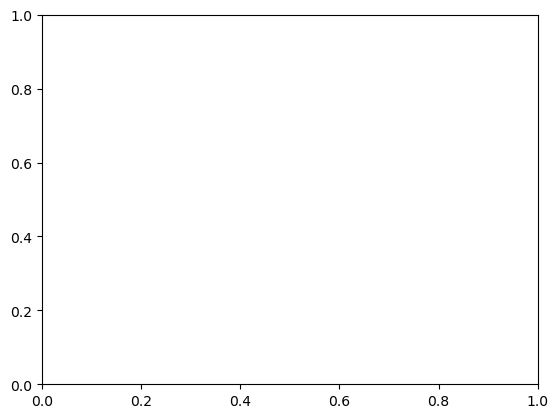

In [37]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Crear un DataFrame de ejemplo para simular las series PCRDelta, PCRTheta y PCRVega
data = {
    'PCRDelta': np.random.uniform(20, 50, 50),
    'PCRTheta': np.random.uniform(20, 50, 50),
    'PCRVega': np.random.uniform(20, 50, 50)
}
df1 = pd.DataFrame(data)

# Definir el eje x como el índice del DataFrame
x = df.index

# Graficar el área apilada para PCRDelta, PCRTheta y PCRVega
plt.stackplot(x, df1['PCRDelta'], df1['PCRTheta'], df1['PCRVega'], labels=['PCRDelta', 'PCRTheta', 'PCRVega'])

# Añadir título y leyenda
plt.title('Gráfico de Áreas Apiladas para PCRDelta, PCRTheta y PCRVega')
plt.legend(loc='upper left')

# Mostrar el gráfico
plt.show()


In [ ]:
x = df.index

# Normalizar las series para asegurar que tengan valores consistentes si es necesario
df['PCRDelta'] = df['PCRDelta'] / df['PCRDelta'].sum()
df['PCRTheta'] = df['PCRTheta'] / df['PCRTheta'].sum()
df['PCRVega'] = df['PCRVega'] / df['PCRVega'].sum()

# Graficar el área apilada para PCRDelta, PCRTheta y PCRVega
plt.stackplot(x, df['PCRDelta'], df['PCRTheta'], df['PCRVega'], labels=['PCRDelta', 'PCRTheta', 'PCRVega'])

# Añadir título y leyenda
plt.title('Gráfico de Áreas Apiladas Normalizado para PCRDelta, PCRTheta y PCRVega')
plt.legend(loc='upper left')

# Mostrar el gráfico
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Leer el archivo CSV
df = pd.read_csv('griegas_apiladas.csv')

# Asegurarse de que las columnas PCRDelta, PCRTheta, y PCRVega existen y están limpias (sin NaN)
df[['PCRDelta', 'PCRTheta', 'PCRVega']] = df[['PCRDelta', 'PCRTheta', 'PCRVega']].fillna(0)

# Definir el eje X (por ejemplo, el índice o una columna temporal si existe)
x = df.index

# Crear el gráfico de áreas apiladas para PCRDelta, PCRTheta y PCRVega
plt.stackplot(x, df['PCRDelta'], df['PCRTheta'], df['PCRVega'], labels=['PCRDelta', 'PCRTheta', 'PCRVega'])

# Añadir título y leyenda
plt.title('Gráfico de Áreas Apiladas para PCRDelta, PCRTheta y PCRVega')
plt.legend(loc='upper left')

# Mostrar el gráfico
plt.show()


In [ ]:
df['Suma'] = df['PCRDelta'] + df['PCRTheta'] + df['PCRVega']
df['Suma']